In [16]:
from skimage import io
from numpy.fft import *
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import time

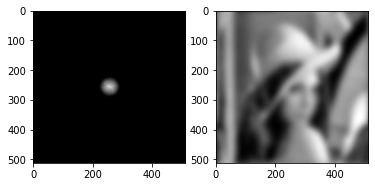

Time: 0.21745061874389648


In [17]:
c = io.imread('lena512gray.jpg')
#存開始時間
start = time.time()
#對圖片做傅立葉轉換後置中
cf = fftshift(fft2(c))
#建立中間為0大小為512的陣列
ar = np.arange(-256,256)
#建立512*512的矩陣
x,y = np.meshgrid(ar,ar)
#做高斯濾波
sigma=10.0
gl = np.exp(-(x**2+y**2)/sigma**2)
cfgl = cf*gl
cfglfft = exposure.rescale_intensity(np.log(1+abs(cfgl)), out_range=(0.0, 1.0))
#印出圖片
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cfglfft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cfgl)), cmap='gray')
plt.show()
#印出時間
end = time.time()
print('Time:',end-start)

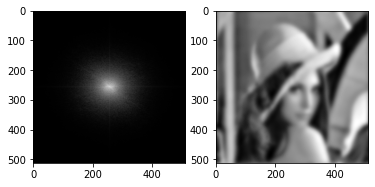

Time: 0.25270700454711914


In [18]:
#存開始時間
start = time.time()
#對圖片做傅立葉轉換後置中
cf = fftshift(fft2(c))
#建立中間為0大小為512的陣列
ar = np.arange(-256,256)
#建立512*512的矩陣
x,y = np.meshgrid(ar,ar)
#做butterworth運算
D=15.0
bl = 1.0/(1.0+((x**2+y**2)/D**2)**2)
cfbl = cf*bl
cfblfft = exposure.rescale_intensity(np.log(1+abs(cfbl)), out_range=(0.0, 1.0))
#印出圖片
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cfblfft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cfbl)), cmap='gray')
plt.show()
#印出時間
end = time.time()
print('Time:',end-start)